# HW2 - Rain Prediction Using Weather Conditions (Logistic Regression Classifier)
Aim:_to build a machine learning model that predicts whether it will rain based on various weather features such as temperature, humidity, atmospheric pressure, season, and location.
This is framed as a binary classification task where the target variable Rain is either 1 (rain) or 0 (no rain)._

## Step 1: Import libraries

In [13]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, classification_report,
    confusion_matrix, roc_curve, auc
)
import kagglehub

## Step 2: Download and load dataset

In [14]:
path = kagglehub.dataset_download("nikhil7280/weather-type-classification")
print("Path to dataset files:", path)

csv_file = [f for f in os.listdir(path) if f.endswith('.csv')][0]
print("CSV file found:", csv_file)

df = pd.read_csv(os.path.join(path, csv_file))
df.head()

Path to dataset files: /kaggle/input/weather-type-classification
CSV file found: weather_classification_data.csv


,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


## Step 3: Data exploration and cleaning

In [15]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


In [16]:
# Drop unused columns
df = df.drop(['sex', 'region', 'smoker'], axis=1, errors='ignore')  # Safe drop if not present

## Step 4: Encoding categorical features

In [17]:
categorical_features = ['Season', 'Cloud Cover', 'Weather Type', 'Location']
df_encoded = pd.get_dummies(df, columns=categorical_features)

## Step 5: Exploratory Data Analysis (EDA)

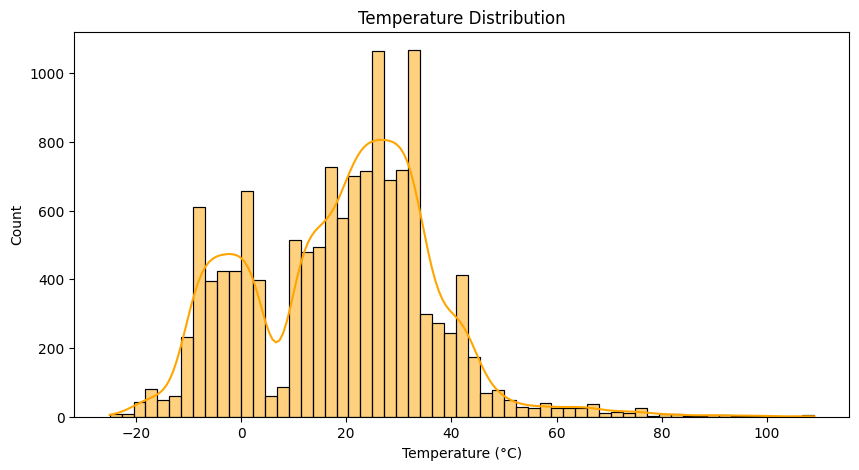

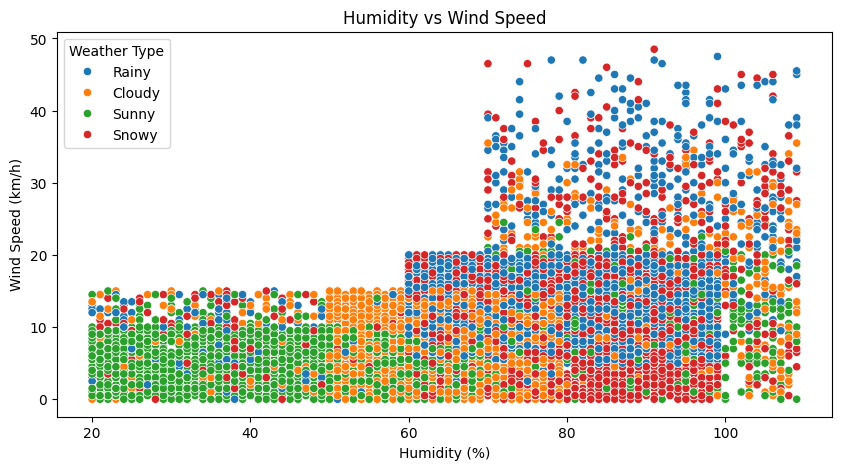

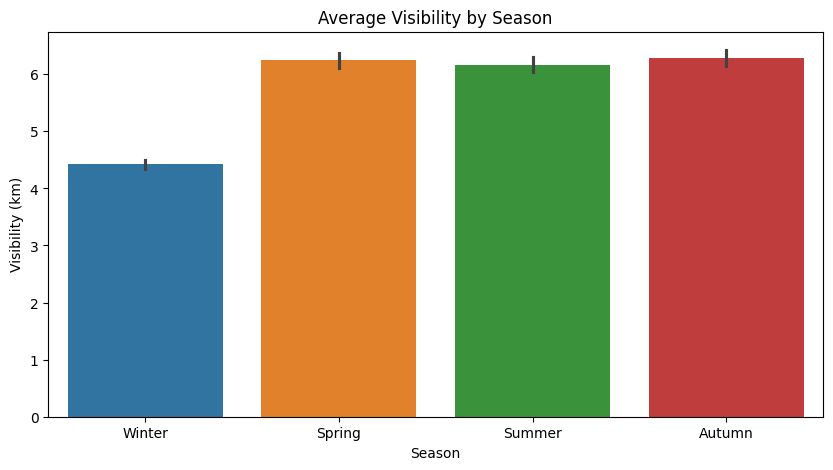

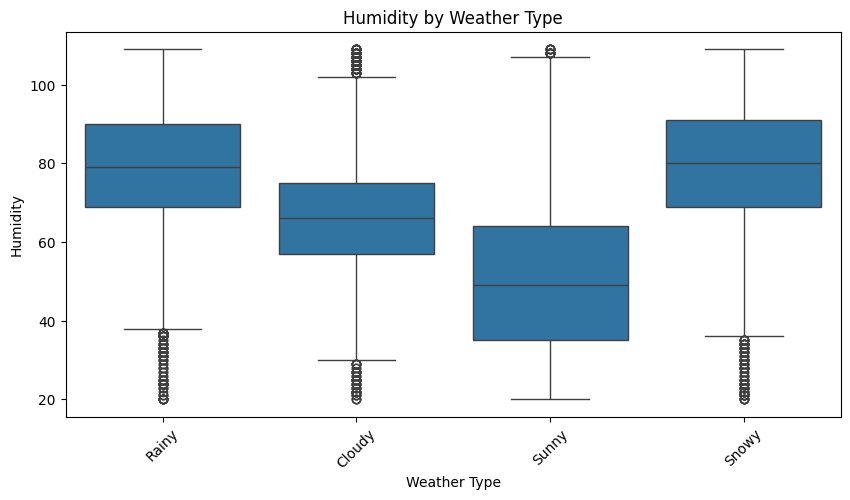

In [32]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Temperature'], kde=True, color="orange")
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Humidity', y='Wind Speed', hue='Weather Type')
plt.title('Humidity vs Wind Speed')
plt.xlabel('Humidity (%)')
plt.ylabel('Wind Speed (km/h)')
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='Season', y='Visibility (km)', hue='Season', legend=False)

plt.title('Average Visibility by Season')
plt.xlabel('Season')
plt.ylabel('Visibility (km)')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Weather Type', y='Humidity')
plt.title('Humidity by Weather Type')
plt.xticks(rotation=45)
plt.show()

## Step 6: Top 10 Locations by Frequency

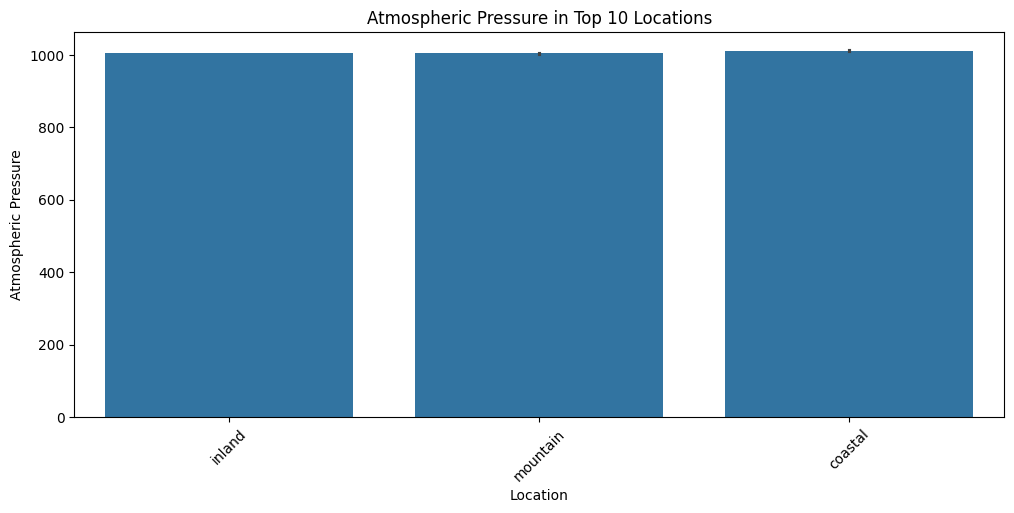

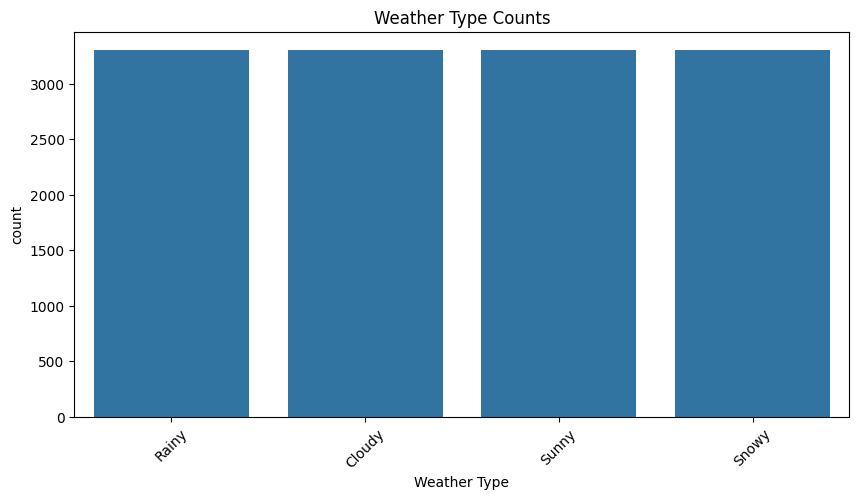

In [34]:
top_locations = df['Location'].value_counts().head(10).index
df_top_locations = df[df['Location'].isin(top_locations)]

plt.figure(figsize=(12, 5))
sns.barplot(data=df_top_locations, x='Location', y='Atmospheric Pressure')
plt.title('Atmospheric Pressure in Top 10 Locations')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Weather Type')
plt.title('Weather Type Counts')
plt.xticks(rotation=45)
plt.show()

## Step 7: Define target and features

In [20]:
df_encoded['Rain'] = (df_encoded['Precipitation (%)'] > 0).astype(int)
X = df_encoded.drop(columns=['Precipitation (%)', 'Rain'])
y = df_encoded['Rain']

## Step 8: Train-test split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 9: Feature scaling

In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Step 10: Train Logistic Regression model

In [23]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

## Step 11: Evaluate model

In [24]:
y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.99
Precision: 0.99
Recall: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.99      1.00      1.00      2614

    accuracy                           0.99      2640
   macro avg       0.50      0.50      0.50      2640
weighted avg       0.98      0.99      0.99      2640



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Step 12: Confusion Matrix

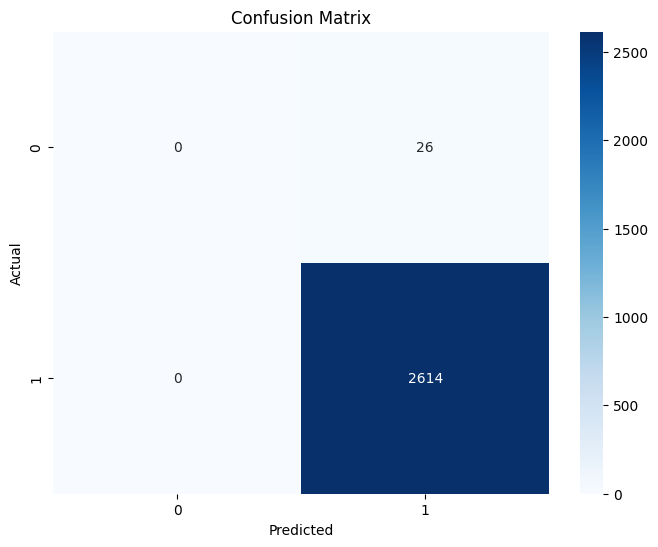

In [25]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Step 13: ROC Curve

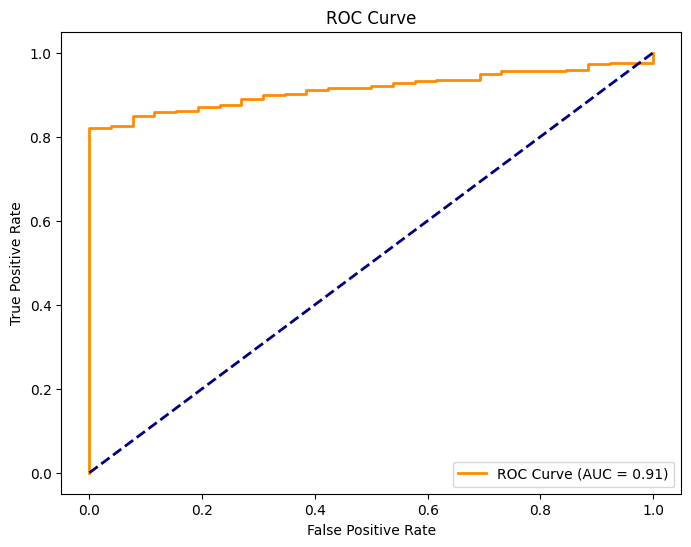

In [26]:
y_prob = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

## Step 14: Final Correlation Matrix

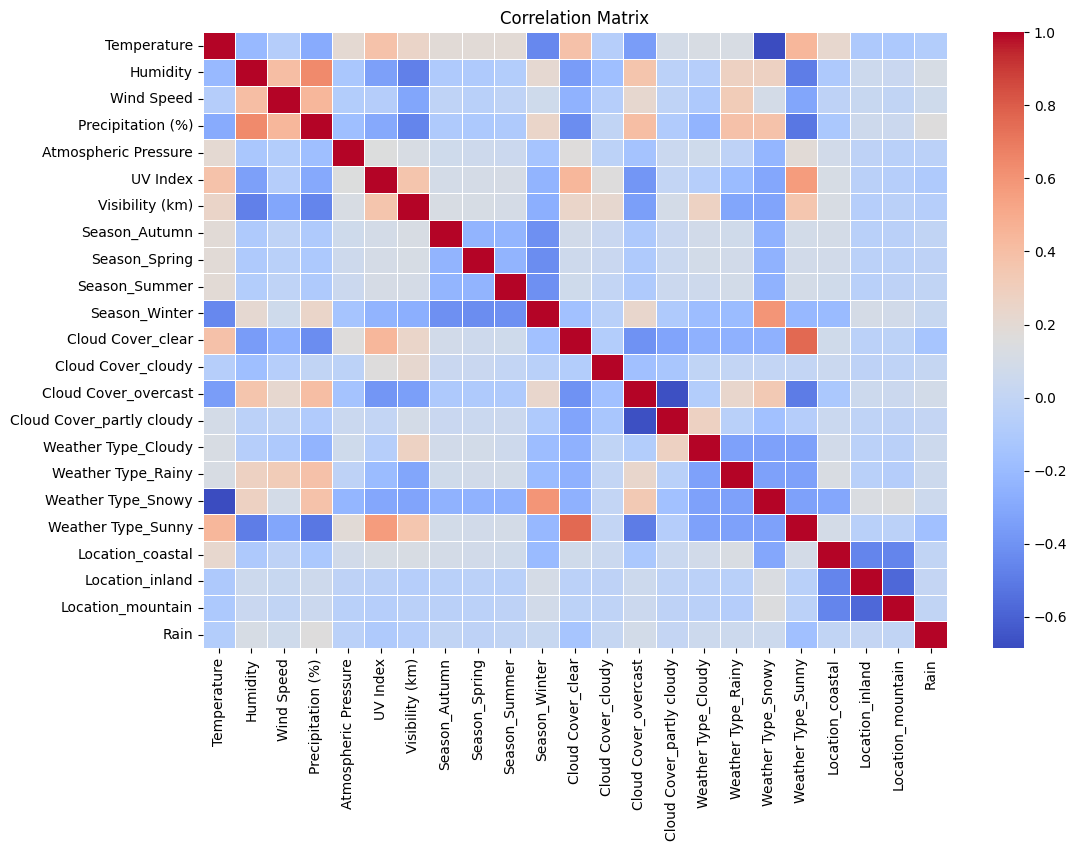

In [27]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Conclusion

This project demonstrates a complete pipeline for predicting rainfall based on weather data using logistic regression.

Key takeaways:
- The model achieved reasonable performance on the binary classification task (`Rain` vs `No Rain`) with solid accuracy, precision, and recall scores.
- Exploratory Data Analysis (EDA) revealed meaningful relationships between features such as humidity, temperature, pressure, and weather type.
- Encoding and scaling significantly improved model training and prediction stability.
- Visual tools like ROC curves and confusion matrices provided valuable insights into model behavior and potential misclassifications.

Overall, the logistic regression model serves as a good baseline for rain prediction using structured weather observations.
